In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("new_insurance_data.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
df.isnull().sum().sum()

52

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
len(df)*0.10

133.8

In [7]:
for ifc in df.select_dtypes(include = 'float').columns:
    if(df[ifc].skew()> 0.5):
        print( ifc, "skewed")
        df[ifc] = df[ifc].fillna(df[ifc].median())
    else:
        print( ifc, "Normal")
        df[ifc] = df[ifc].fillna(df[ifc].mean())

age Normal
bmi Normal
children skewed
Claim_Amount Normal
past_consultations Normal
num_of_steps Normal
Hospital_expenditure skewed
NUmber_of_past_hospitalizations Normal
Anual_Salary skewed
charges skewed


age


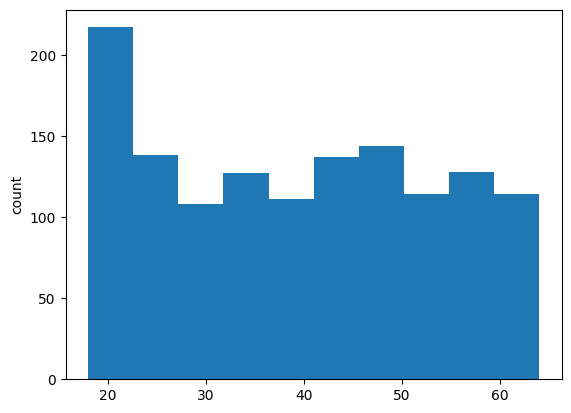

bmi


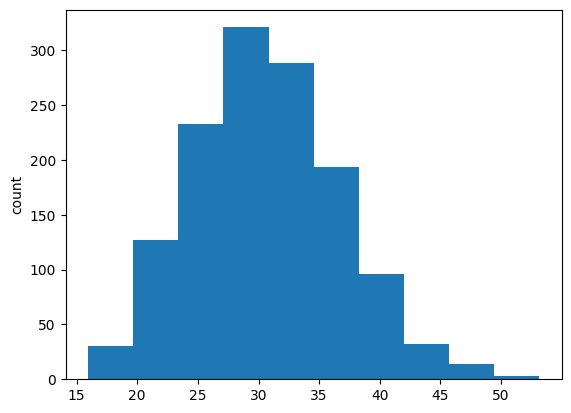

children


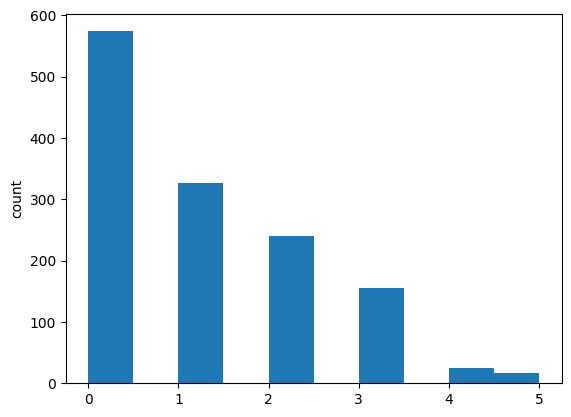

Claim_Amount


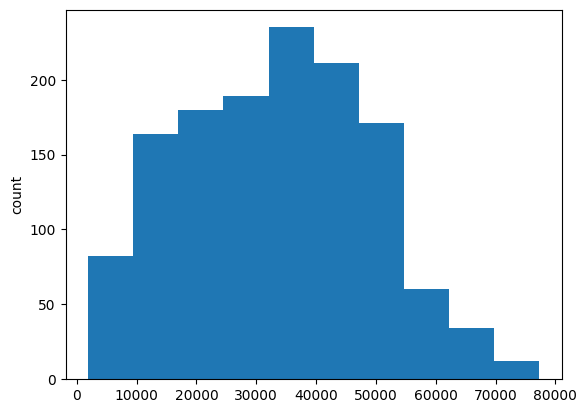

past_consultations


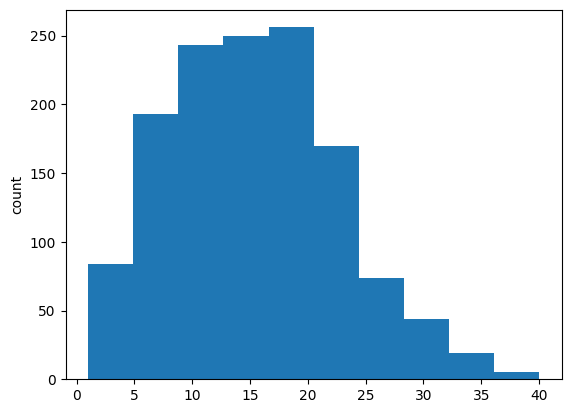

num_of_steps


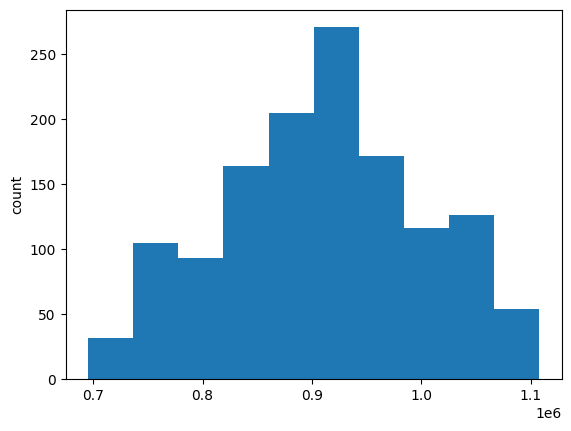

Hospital_expenditure


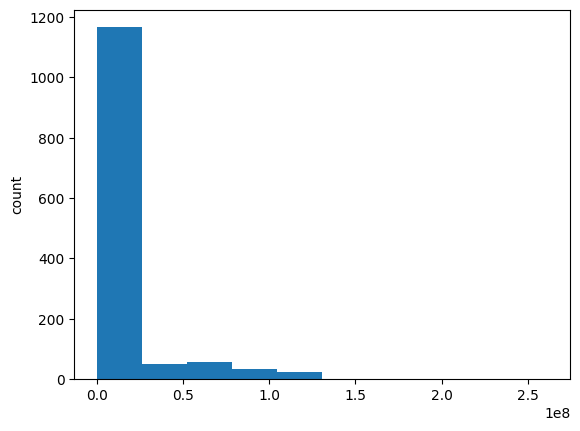

NUmber_of_past_hospitalizations


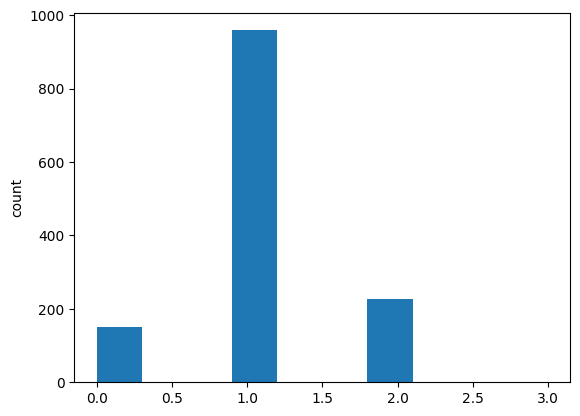

Anual_Salary


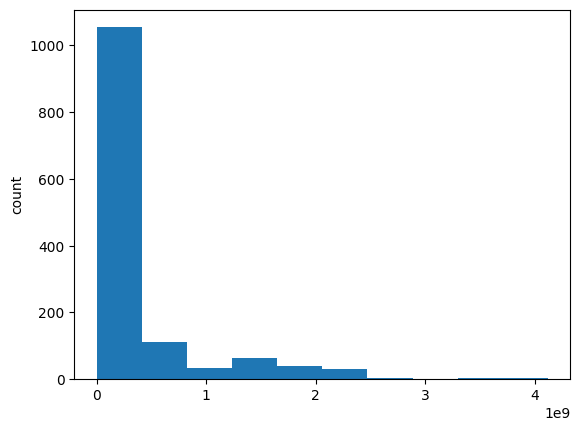

charges


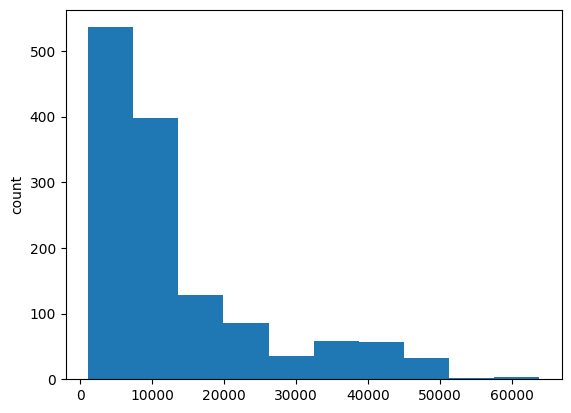

In [8]:
# Visualization

for i in df.select_dtypes(include = 'float64').columns:
    plt.hist(df[i])
    print(i)
    plt.ylabel('count')
    plt.show()

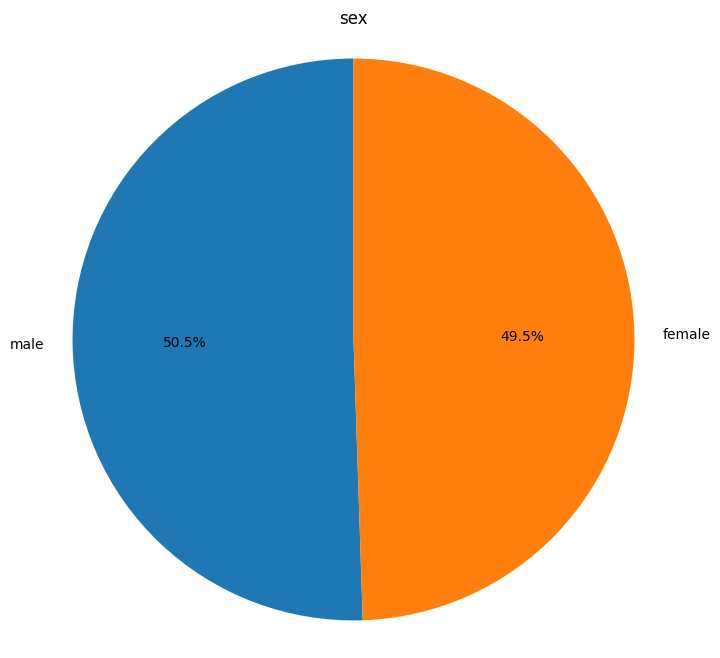

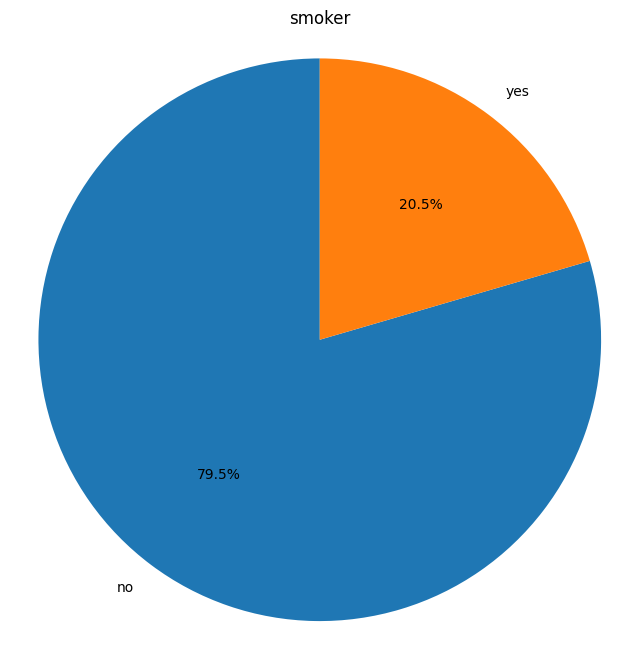

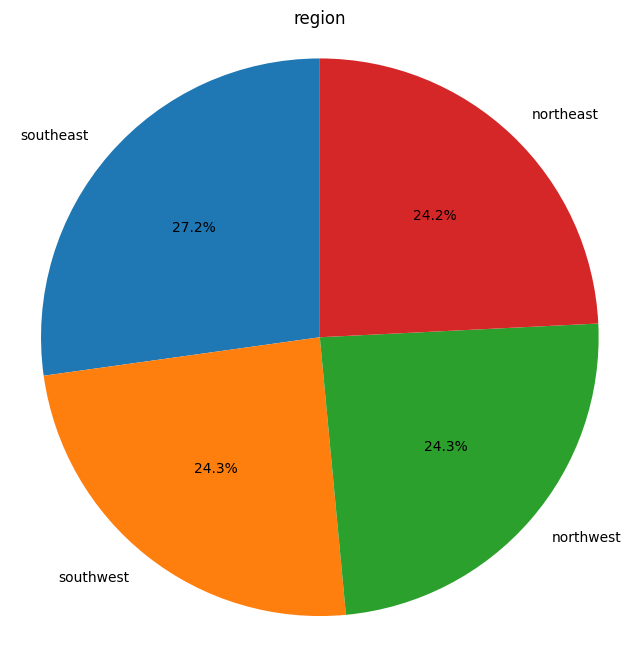

In [9]:
for i in df.select_dtypes(include = 'object'):
    plt.figure(figsize=(8,8))
    cnt = df[i].value_counts()
    plt.title(i)
    plt.pie(cnt, labels = cnt.index, autopct = '%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.show()


age


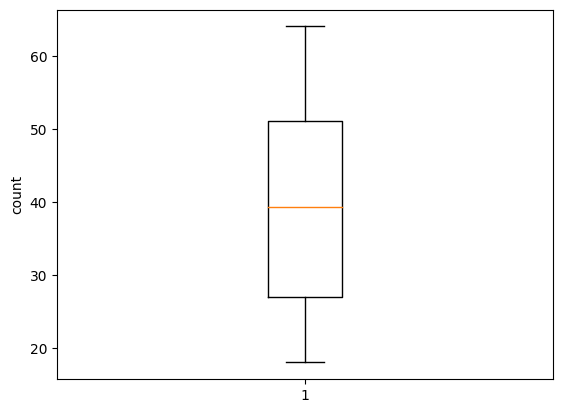

bmi


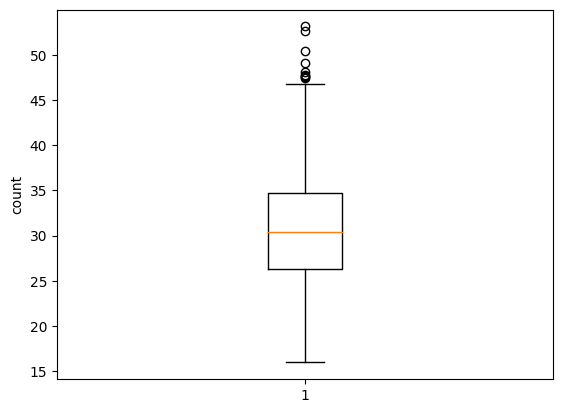

children


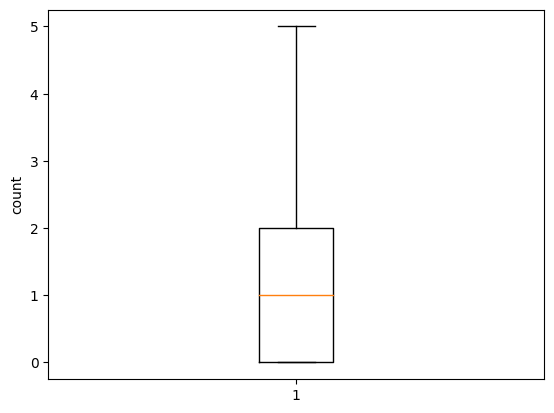

Claim_Amount


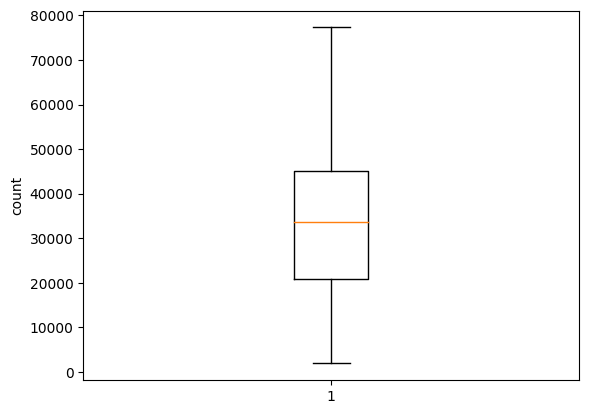

past_consultations


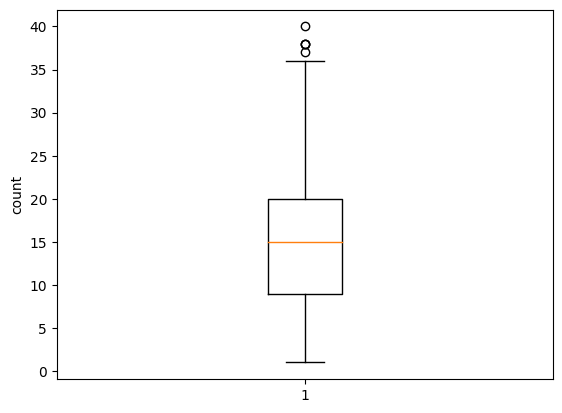

num_of_steps


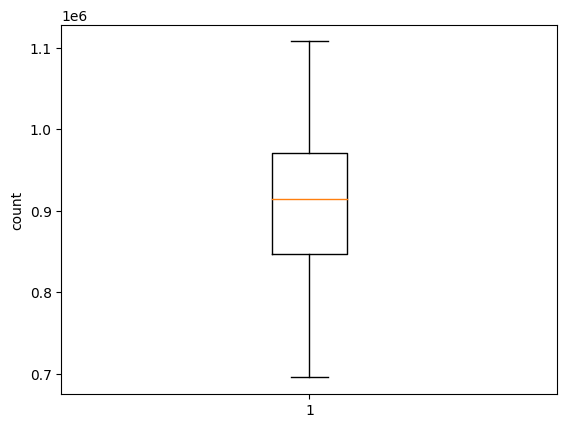

Hospital_expenditure


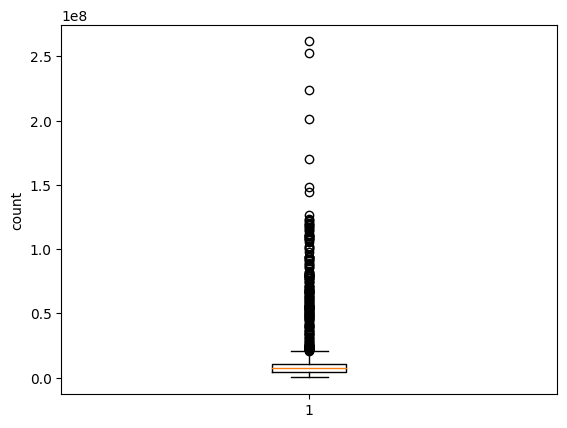

NUmber_of_past_hospitalizations


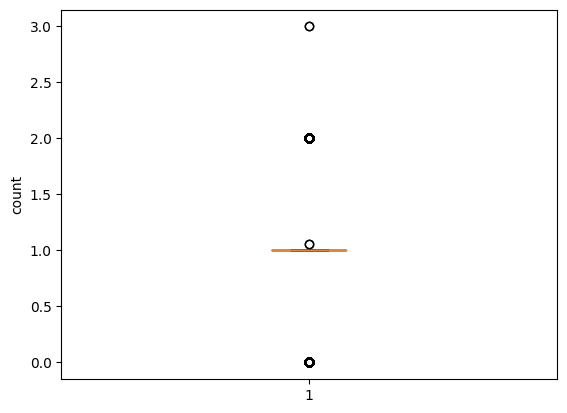

Anual_Salary


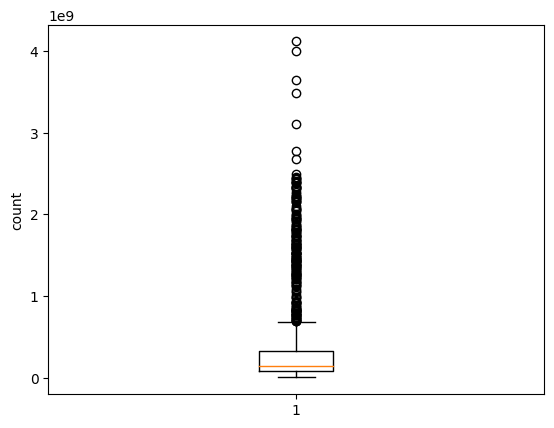

charges


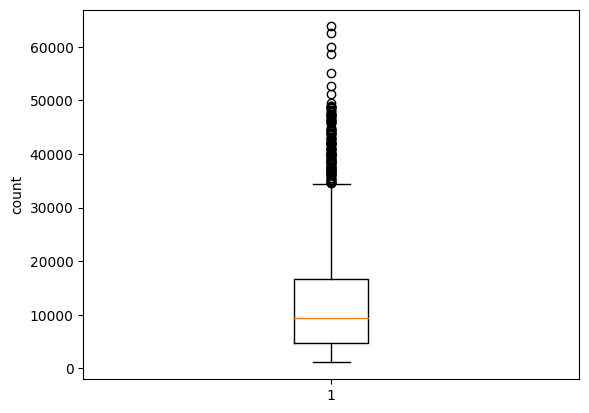

In [10]:

for i in df.select_dtypes(include = 'float64').columns:
    plt.boxplot(df[i])
    print(i)
    plt.ylabel('count')
    plt.show()

In [11]:
outlier_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
for i in outlier_list:
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    
    df = df[(df[i]>Q1 - Q1-1.5*IQR) & (df[i]< Q3+1.5*IQR)]

age


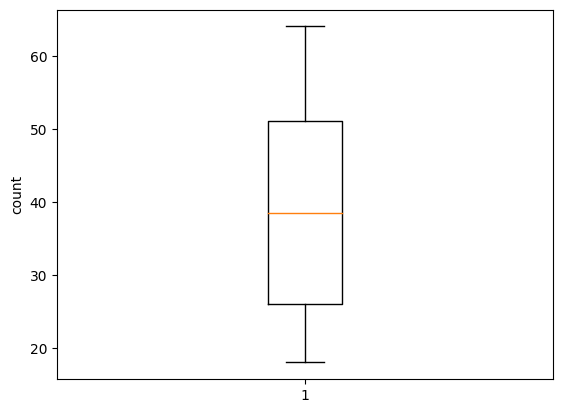

bmi


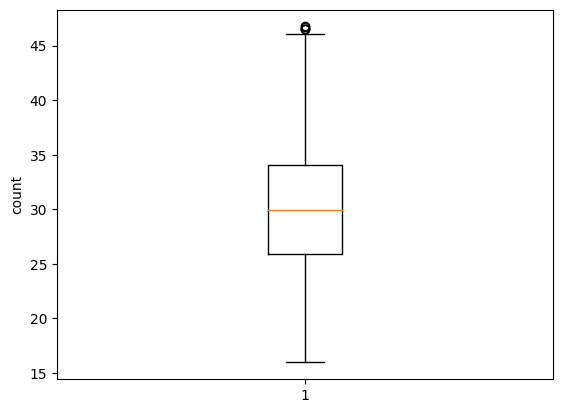

children


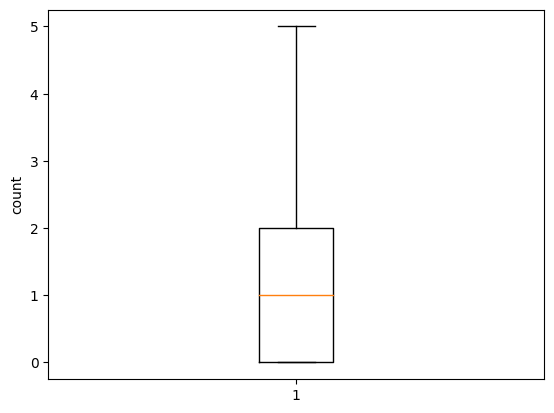

Claim_Amount


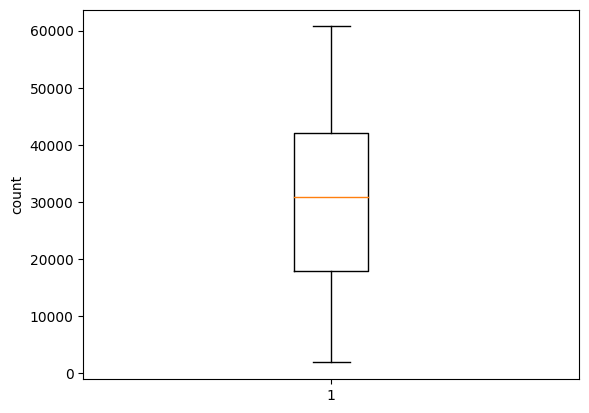

past_consultations


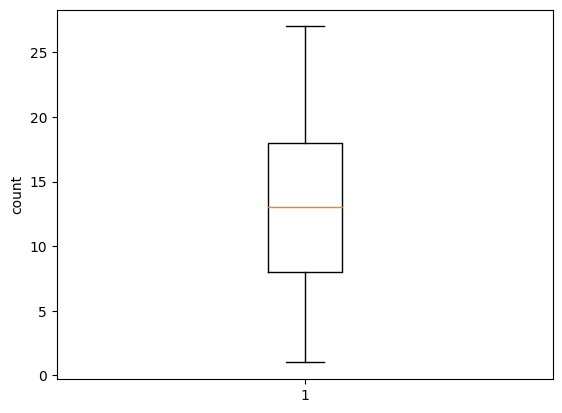

num_of_steps


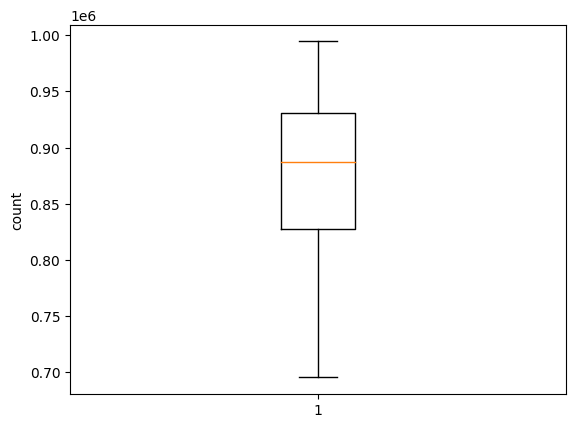

Hospital_expenditure


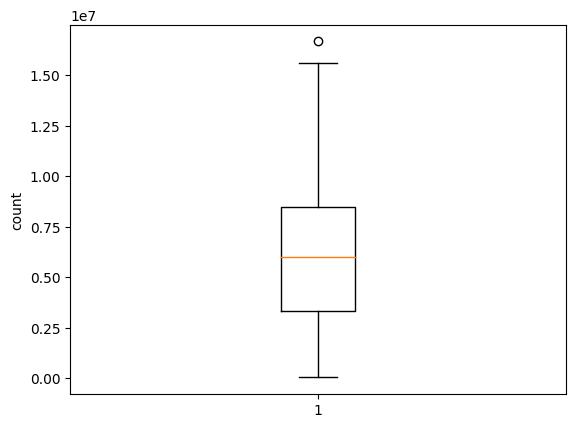

NUmber_of_past_hospitalizations


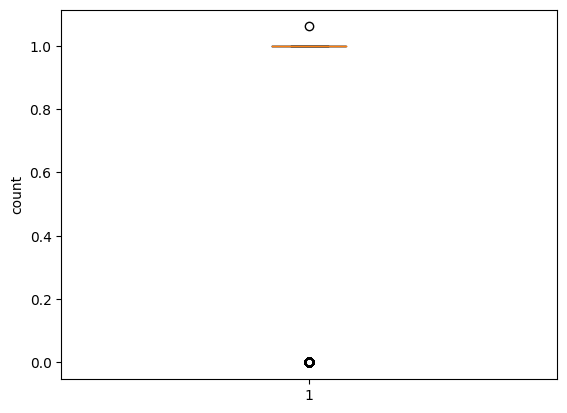

Anual_Salary


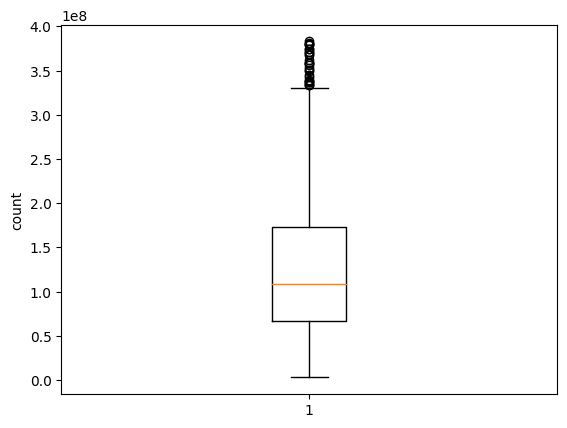

charges


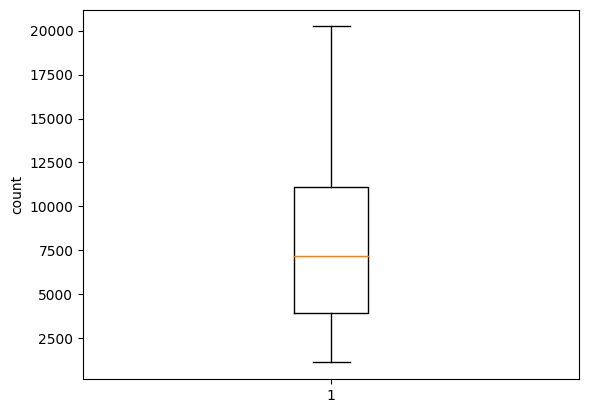

In [12]:
for i in df.select_dtypes(include = 'float64').columns:
    plt.boxplot(df[i])
    print(i)
    plt.ylabel('count')
    plt.show()

In [13]:
df.shape

(1030, 13)

In [14]:
df.duplicated().sum()

0

In [15]:
df = df.drop(['NUmber_of_past_hospitalizations'],axis = 1)

In [16]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.419361e+08,northeast,19798.05455


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

col_list = []

for i in df.columns:
    if (df[i].dtype != 'object') & (i != 'charges'):
        col_list.append(i)

X = df[col_list]

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,age,13.801914
1,bmi,25.547836
2,children,1.839450
3,Claim_Amount,5.683519
4,past_consultations,6.252413
5,num_of_steps,54.593495
6,Hospital_expenditure,5.322783
7,Anual_Salary,5.708617


In [18]:
df = df.drop(['num_of_steps'], axis = 1)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

col_list = []

for i in df.columns:
    if (df[i].dtype != 'object') & (i != 'charges'):
        col_list.append(i)

X = df[col_list]

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,age,11.482767
1,bmi,12.223851
2,children,1.765597
3,Claim_Amount,5.212122
4,past_consultations,5.810208
5,Hospital_expenditure,5.013017
6,Anual_Salary,5.579616


In [20]:
df = df.drop(['age'], axis = 1)
df = df.drop(['bmi'], axis = 1)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

col_list = []

for i in df.columns:
    if (df[i].dtype != 'object') & (i != 'charges'):
        col_list.append(i)

X = df[col_list]

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,children,1.714400
1,Claim_Amount,4.169418
2,past_consultations,4.671708
3,Hospital_expenditure,4.391913
4,Anual_Salary,4.398658


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
y = df.iloc[:,-1]
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 1030, dtype: float64

In [24]:
X

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,1.419361e+08


In [25]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, train_size = 0.80, random_state = 999)
X_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
378,2.0,46073.654360,5.0,2.606962e+06,4.707590e+07
730,0.0,55821.532460,17.0,5.048570e+06,1.725900e+08
66,0.0,17975.327670,14.0,4.993491e+05,5.445941e+07
391,0.0,31971.078820,16.0,9.642962e+06,4.098743e+07
845,3.0,52155.958830,11.0,7.683186e+06,1.969077e+08
...,...,...,...,...,...
477,2.0,30943.342060,17.0,2.941387e+06,6.400286e+07
227,1.0,16091.000090,11.0,3.454417e+06,7.257541e+07
483,2.0,18512.993280,16.0,7.442466e+05,1.368503e+08
875,0.0,41844.564980,8.0,1.191697e+07,1.629471e+08


In [26]:
l_model = LinearRegression()

In [27]:
l_model.fit(X_train,y_train)

LinearRegression()

In [28]:
predictions = l_model.predict(X_test)

In [29]:
predictions

array([10471.25366235,  5529.11641942,  6048.35213521,  4425.99288888,
        4118.86086489,  7154.72616597,  4648.07601625,  6222.23679043,
        3303.81369784,  7093.51748123,  4133.18968095,  5029.83661262,
        5313.11528515,  5704.04971904, 17078.46509781,  5435.55726455,
        8503.24039661,  8501.28232022,  9260.49724432, 12948.55988322,
        7294.69367534,  8150.12881153,  4813.81049389,  3519.73342868,
        9416.80750606,  3345.93031819,  4401.6093029 ,  4878.02158983,
        3989.87672788,  3486.00012411,  4990.38933128,  4165.68838325,
        7555.35403259,  2168.56642126, 14409.90355064, 13197.08202659,
       17589.27499619, 16807.77427262, 10032.6239167 ,  7025.39336093,
        4897.52432216,  5966.24684499,  5652.36614817,  6765.28035805,
        7459.8774265 ,  5040.15795553,  5285.67826969, 19306.18534822,
        5778.08364604, 13137.04266399,  2203.79314229,  7088.18046215,
        6247.74907681,  4175.13089163,  9734.88884563,  6023.34477827,
      

In [30]:
from sklearn.metrics import * 
r2score = r2_score(y_test, predictions)
r2score

0.8434587218024447

In [31]:
X_test

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
688,0.0,55041.11308,16.0,9347759.462,1.776668e+08
118,0.0,41088.03452,5.0,9130424.338,8.280646e+07
162,0.0,40556.76177,4.0,8480882.157,9.511170e+07
319,4.0,49387.26568,21.0,6722423.975,3.013997e+07
95,0.0,46294.14244,12.0,8618011.074,4.945314e+07
...,...,...,...,...,...
710,1.0,16041.60718,11.0,2058404.704,1.081633e+08
303,2.0,50874.98966,11.0,1295881.058,3.472714e+07
292,2.0,15024.52722,3.0,9950954.420,1.925496e+07
384,2.0,29946.32144,15.0,4697699.977,5.466699e+07


In [32]:
a = l_model.predict([[3,47488,18,3788,500032]])
a

c:\users\nishanth\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([2237.06217683])

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

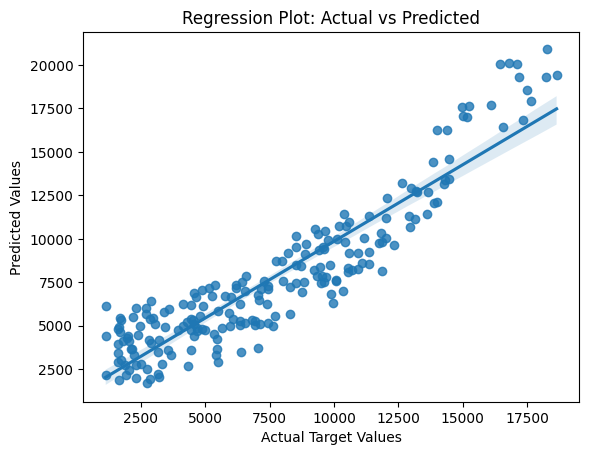

In [34]:
sns.regplot(x = y_test, y = predictions)

plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot: Actual vs Predicted")
plt.show()